In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%load_ext autoreload
#%autoreload 2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
ruta = '/content/drive/MyDrive/Programación Analítica Datos/Semana 9/'
bitcoin = pd.read_csv(ruta + 'BTC-EUR.csv')

In [ ]:
#link = 'https://es.finance.yahoo.com/quote/ETH-EUR/history?period1=1510272000&period2=1682121600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'
#bitcoin = pd.read_csv(link)

Datos extraidos de https://es.finance.yahoo.com/quote/BTC-EUR/history?period1=1410825600&period2=1681344000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [ ]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


In [ ]:
bitcoin.index

RangeIndex(start=0, stop=3131, step=1)

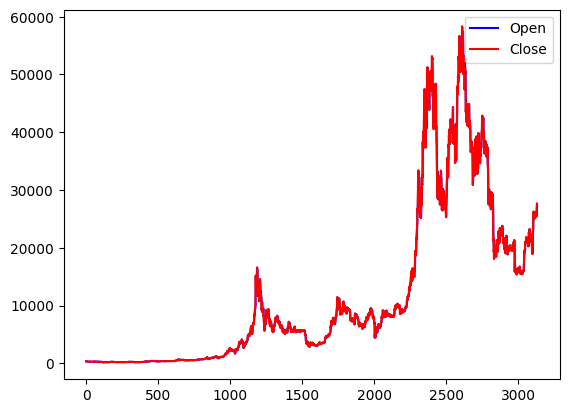

In [ ]:
bitcoin['Open'].plot(color='blue',label='Open')
bitcoin['Close'].plot(color='r',label='Close')
plt.legend()

In [ ]:
#Pasemos las fechas como índices
bitcoin = pd.read_csv(ruta +'BTC-EUR.csv',index_col='Date',parse_dates=True)

In [ ]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-07',
               '2023-04-08', '2023-04-09', '2023-04-10', '2023-04-11',
               '2023-04-12', '2023-04-13'],
              dtype='datetime64[ns]', name='Date', length=3131, freq=None)

El tipo datetime64 puede medir intervalos de tiempo

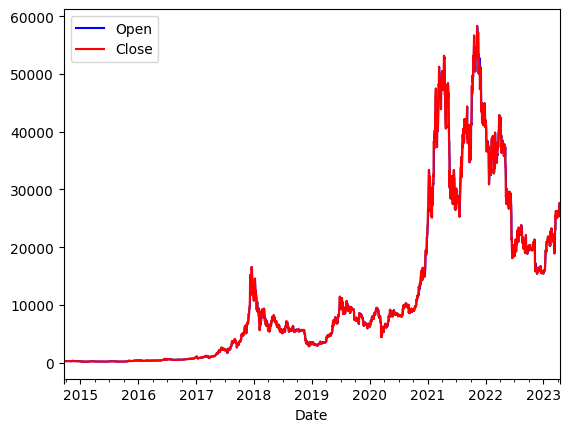

In [ ]:
bitcoin['Open'].plot(color='blue',label='Open')
bitcoin['Close'].plot(color='r',label='Close')
plt.legend()

In [ ]:
#ax,fig= plt.subplots(2)
#ax[0].plot([1,2,3],[1,2,3])
#ax[1].plot([1,2,3],[1,2,3])
valores = {'fechas':['01-ene-2020','20-feb-2021','04-mar-2022'],'dólar':['Subió','bajó','bajó']}
val_df = pd.DataFrame(valores)
val_df

,fechas,dólar
0,01-ene-2020,Subió
1,20-feb-2021,bajó
2,04-mar-2022,bajó


In [ ]:
val_df['fechas'] = val_df['fechas'].str.replace('ene','01').str.replace('feb','02').str.replace('mar','03')
val_df['fechas'] = val_df['fechas'].astype('datetime64')

<ipython-input-12-15a2a4b7b1a6>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  val_df['fechas'] = val_df['fechas'].astype('datetime64')


In [ ]:
val_df.dtypes

fechas    datetime64[ns]
dólar             object
dtype: object

<ipython-input-14-212c0550b3b9>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2020']['Close'].plot(color='orange')


<Axes: xlabel='Date'>

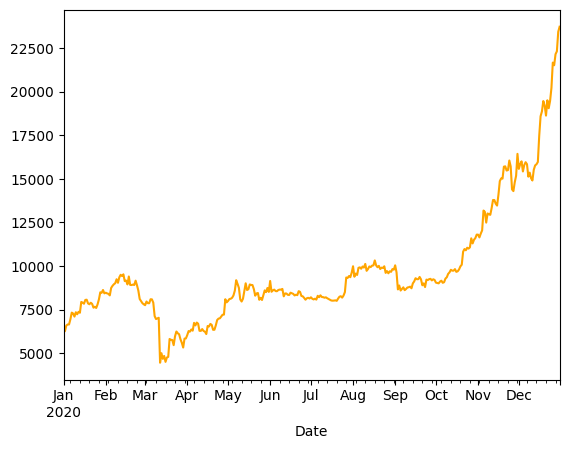

In [ ]:
bitcoin['2020']['Close'].plot(color='orange')

<ipython-input-15-77f6d507320b>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2020-02']['Close'].plot(color='orange')


<Axes: xlabel='Date'>

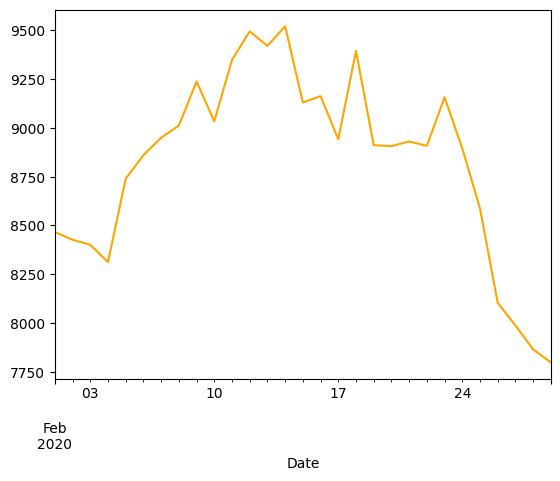

In [ ]:
#Grafique el cambio en el valor del bitcoin en febrero de 2021
bitcoin['2020-02']['Close'].plot(color='orange')

In [ ]:
bitcoin.shape

(3131, 6)

In [ ]:
#Grafique los valores de apertura y clausura en el bitcoin entre 2019 y 2021



##Función Resample

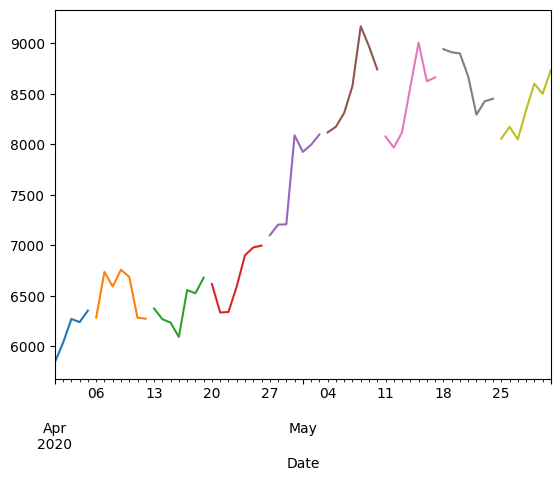

In [ ]:
bitcoin.loc['2020-04':'2020-05','Open'].resample('W').plot()
plt.show()

In [ ]:
muestras = bitcoin.loc['2020-04':'2020-05','Open'].resample('W')
muestras.groups

{Timestamp('2020-04-05 00:00:00', freq='W-SUN'): 5,
 Timestamp('2020-04-12 00:00:00', freq='W-SUN'): 12,
 Timestamp('2020-04-19 00:00:00', freq='W-SUN'): 19,
 Timestamp('2020-04-26 00:00:00', freq='W-SUN'): 26,
 Timestamp('2020-05-03 00:00:00', freq='W-SUN'): 33,
 Timestamp('2020-05-10 00:00:00', freq='W-SUN'): 40,
 Timestamp('2020-05-17 00:00:00', freq='W-SUN'): 47,
 Timestamp('2020-05-24 00:00:00', freq='W-SUN'): 54,
 Timestamp('2020-05-31 00:00:00', freq='W-SUN'): 61}

#Intente grupos por años

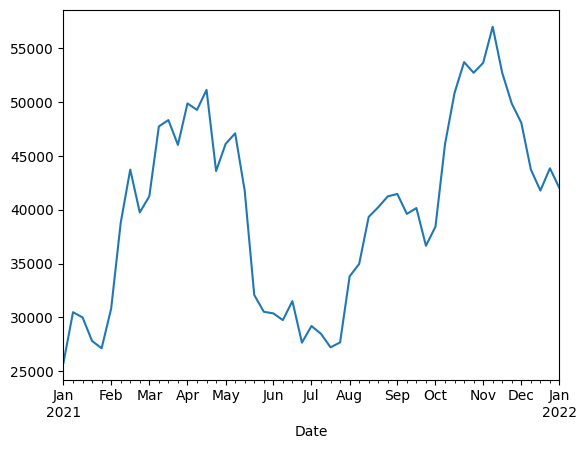

In [ ]:
bitcoin.loc['2021','Close'].resample('W').mean().plot()
plt.show()

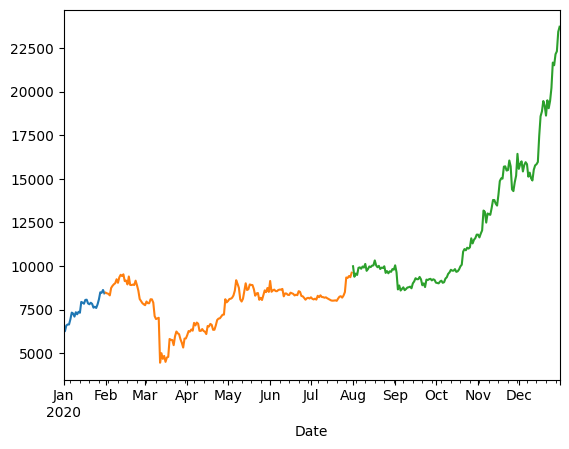

In [ ]:
bitcoin.loc['2020','Close'].resample('6M').plot(label ='prom 2020')
#bitcoin.loc['2021','Close'].resample('W').mean().plot(label ='prom 2021')
plt.show()

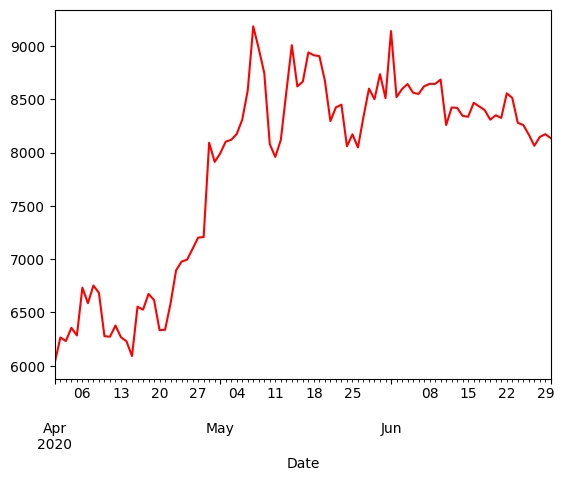

In [ ]:
bitcoin.loc['2020-04':'2020-06','Close'].plot(label='2do trimestre 2020',color='red')
plt.show()

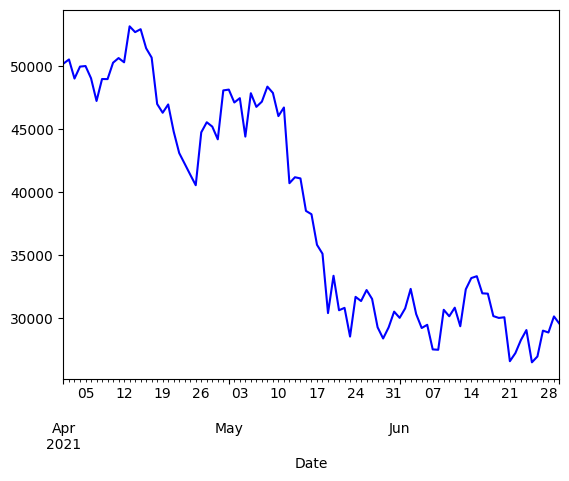

In [ ]:
bitcoin.loc['2021-04':'2021-06','Close'].plot(label='2do trimestre 2021',color='blue')
plt.show()

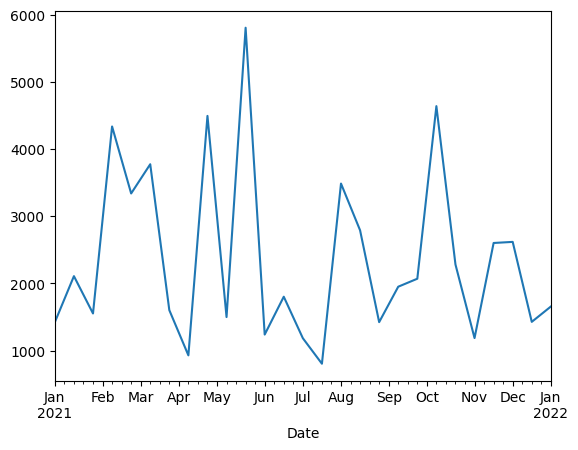

In [ ]:
bitcoin.loc['2021','Close'].resample('2W').std().plot()
plt.show()

Muestre en una misma gráfica la variación de bitcoin en 2022, la variación por promedio mensual, y la variación por promedio semanal.

Repita el ejercicio anterior, pero esta vez mostrando la desviación estándar.

##FUNCIÓN AGGREGATE

In [ ]:
bitcoin.loc['2021','Open'].resample('2M').agg(['mean','std','min','max'])

,mean,std,min,max
Date,,,,
2021-01-31,28473.263105,2534.483921,23735.423828,33364.945313
2021-03-31,42061.833190,6058.108056,27316.281250,51217.171875
2021-05-31,43304.031378,7444.436389,28384.060547,53140.605469
2021-07-31,29369.017738,2171.539782,25290.460938,35557.011719
2021-09-30,38872.875961,2700.698527,32195.878906,44351.761719
2021-11-30,51342.512103,4341.785480,37858.234375,58290.289063
2022-01-31,43938.343498,2589.576710,40925.542969,50549.601563


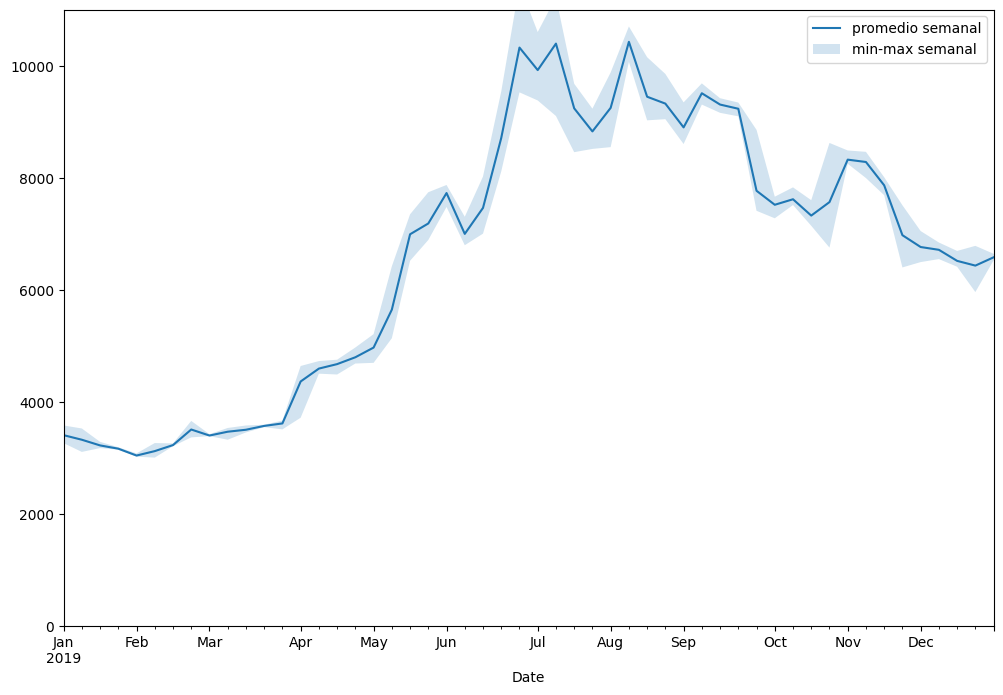

<Figure size 640x480 with 0 Axes>

In [ ]:
m = bitcoin['Close'].resample('W').agg(['mean','std','min','max'])

plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label = 'promedio semanal',ylim =(0,11000) )
plt.fill_between(m.index,m['max'],m['min'],alpha=0.2,label ='min-max semanal')
plt.legend()
plt.show()
plt.tight_layout()

Grafique el promedio mensual en los últimos cinco años y muestre los mínimos y máximos

Cree la base de datos con la criptomoneda Ethereum a partir de ETH-EUR.csv

In [ ]:
##Haga que las fechas sean los índices
eth = pd.read_csv(ruta+'ETH-EUR.csv',index_col='Date',parse_dates=True)
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-14,2861.636475,2879.772949,2758.325684,2790.517090,2790.517090,14619624873
2022-04-15,2790.725098,2817.905029,2776.531250,2812.564941,2812.564941,10411355802
2022-04-16,2812.756104,2843.984375,2789.908936,2832.352295,2832.352295,8108391783
2022-04-17,2831.956055,2844.806641,2764.178223,2768.209473,2768.209473,9675952924
2022-04-18,2768.283936,2839.743896,2680.900635,2836.202393,2836.202393,17280409170


Use pd.merge() para fusionar las bases de datos bitcoin y ethereum

¿Qué columna tienen en común? Hágalo por unión interna
Si hay más columnas con el mismo nombre en las dos bases, por ejemplo 'Open', se debe definir qué sufijo llevará cada columna. Para ello, se pasa el argumento suffixes = ('_btc','_eth')

In [ ]:
##
eth.loc[:,'Comprar'] = 0
eth

,Open,High,Low,Close,Adj Close,Volume,Comprar
Date,,,,,,,
2022-04-14,2861.636475,2879.772949,2758.325684,2790.517090,2790.517090,14619624873,0
2022-04-15,2790.725098,2817.905029,2776.531250,2812.564941,2812.564941,10411355802,0
2022-04-16,2812.756104,2843.984375,2789.908936,2832.352295,2832.352295,8108391783,0
2022-04-17,2831.956055,2844.806641,2764.178223,2768.209473,2768.209473,9675952924,0
2022-04-18,2768.283936,2839.743896,2680.900635,2836.202393,2836.202393,17280409170,0
...,...,...,...,...,...,...,...
2023-04-09,1695.739136,1708.860596,1681.637329,1682.203613,1682.203613,4562612658,0
2023-04-10,1682.361938,1718.026245,1663.286865,1703.816528,1703.816528,5829243924,0
2023-04-11,1704.140381,1764.615967,1704.389893,1758.280273,1758.280273,7709589451,0


In [ ]:
#Si el precio de cierre es mayor a apertura, comprar = 1
#1. Crear una máscara, y pasarla a la columna comprar
#2. Usar el método .apply()
#3. 

In [ ]:
mascara = eth['Close'] > eth['Open'] 
eth.loc[mascara,'Comprar'] = 1
eth

,Open,High,Low,Close,Adj Close,Volume,Comprar
Date,,,,,,,
2022-04-14,2861.636475,2879.772949,2758.325684,2790.517090,2790.517090,14619624873,0
2022-04-15,2790.725098,2817.905029,2776.531250,2812.564941,2812.564941,10411355802,1
2022-04-16,2812.756104,2843.984375,2789.908936,2832.352295,2832.352295,8108391783,1
2022-04-17,2831.956055,2844.806641,2764.178223,2768.209473,2768.209473,9675952924,0
2022-04-18,2768.283936,2839.743896,2680.900635,2836.202393,2836.202393,17280409170,1
...,...,...,...,...,...,...,...
2023-04-09,1695.739136,1708.860596,1681.637329,1682.203613,1682.203613,4562612658,0
2023-04-10,1682.361938,1718.026245,1663.286865,1703.816528,1703.816528,5829243924,1
2023-04-11,1704.140381,1764.615967,1704.389893,1758.280273,1758.280273,7709589451,1


In [ ]:
eth.loc[:,'Vender'] = 0
eth

,Open,High,Low,Close,Adj Close,Volume,Comprar,Vender
Date,,,,,,,,
2022-04-14,2861.636475,2879.772949,2758.325684,2790.517090,2790.517090,14619624873,0,0
2022-04-15,2790.725098,2817.905029,2776.531250,2812.564941,2812.564941,10411355802,1,0
2022-04-16,2812.756104,2843.984375,2789.908936,2832.352295,2832.352295,8108391783,1,0
2022-04-17,2831.956055,2844.806641,2764.178223,2768.209473,2768.209473,9675952924,0,0
2022-04-18,2768.283936,2839.743896,2680.900635,2836.202393,2836.202393,17280409170,1,0
...,...,...,...,...,...,...,...,...
2023-04-09,1695.739136,1708.860596,1681.637329,1682.203613,1682.203613,4562612658,0,0
2023-04-10,1682.361938,1718.026245,1663.286865,1703.816528,1703.816528,5829243924,1,0
2023-04-11,1704.140381,1764.615967,1704.389893,1758.280273,1758.280273,7709589451,1,0


In [ ]:
masc = eth['Open'] > eth['Close']
eth.loc[masc,'Vender'] = 1


In [ ]:
eth

,Open,High,Low,Close,Adj Close,Volume,Comprar,Vender
Date,,,,,,,,
2022-04-14,2861.636475,2879.772949,2758.325684,2790.517090,2790.517090,14619624873,0,1
2022-04-15,2790.725098,2817.905029,2776.531250,2812.564941,2812.564941,10411355802,1,0
2022-04-16,2812.756104,2843.984375,2789.908936,2832.352295,2832.352295,8108391783,1,0
2022-04-17,2831.956055,2844.806641,2764.178223,2768.209473,2768.209473,9675952924,0,1
2022-04-18,2768.283936,2839.743896,2680.900635,2836.202393,2836.202393,17280409170,1,0
...,...,...,...,...,...,...,...,...
2023-04-09,1695.739136,1708.860596,1681.637329,1682.203613,1682.203613,4562612658,0,1
2023-04-10,1682.361938,1718.026245,1663.286865,1703.816528,1703.816528,5829243924,1,0
2023-04-11,1704.140381,1764.615967,1704.389893,1758.280273,1758.280273,7709589451,1,0


<ipython-input-53-e4d27e9ea537>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax[0].plot(eth['2022-04']['Vender'],label='Vender',color='r')
<ipython-input-53-e4d27e9ea537>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax[1].plot(eth['2022-04']['Comprar'],label='Comprar',color='b')


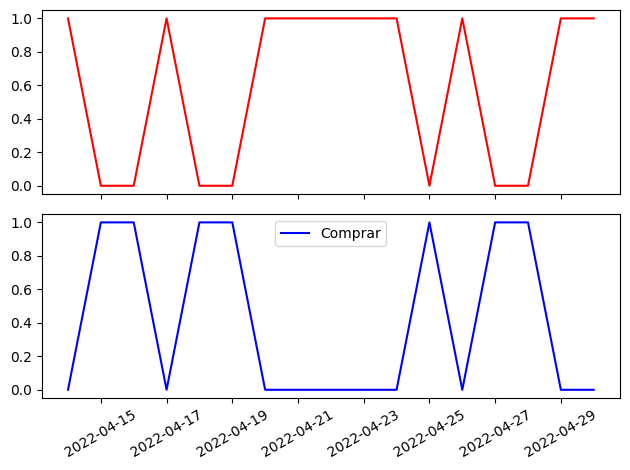

In [ ]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].plot(eth['2022-04']['Vender'],label='Vender',color='r')
ax[1].plot(eth['2022-04']['Comprar'],label='Comprar',color='b')
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<ipython-input-46-af991a80fae2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  eth['2022-04']['Vender'].plot(color='r',label='Venta')
<ipython-input-46-af991a80fae2>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  eth['2022-04']['Comprar'].plot(color='b',label='Comprar')


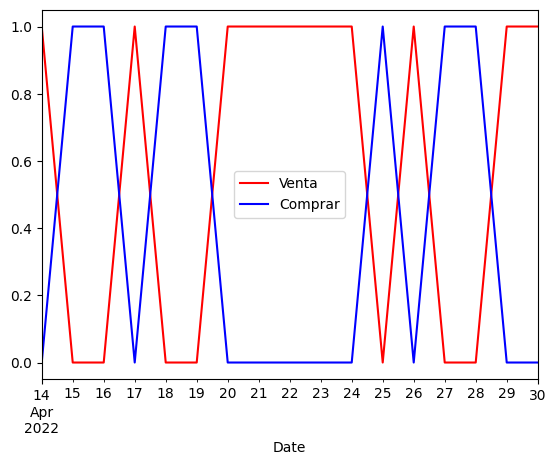

In [ ]:
eth['2022-04']['Vender'].plot(color='r',label='Venta')
eth['2022-04']['Comprar'].plot(color='b',label='Comprar')
plt.legend()
plt.show()

Seleccione del df las columnas 'Close_btc' y 'Close_eth' y compare en una gráfica sus variaciones.

¿Qué ocurre cuando pasa el parámetro subplots = True?

Relice la matriz de correlación entre 'Close_btc' y 'Close_eth'.


```
# Esto tiene formato de código
```



Relice la matriz de correlación entre 'Open_btc' y 'Open_eth'.

In [ ]:
#import seaborn as sns
#sns.heatmap(matriz_correlacion)

Lea en la documentación el uso del método rolling(), y calcule sobre el dataframe bitcoin


1.   El máximo de los últimos 28 días
2.   El mínimo de los últimos 28 días


Cree las columnas 'Comprar' y 'Vender' en bitcoin, de la siguiente manera

bitcoin['Comprar'] = np.zeros(len(bitcoin))

Si 'Close' > max28, entonces Comprar = 1.
Si 'Close' < min28, entonces Vender = -1.

Realice dos gráficas en función de 2022 de

1. Close, min, max.
2. Comprar y Vender

